# Homework 4: Data Visualization
- **Name**:  Shyrezz Ahmed Khan Imtiaz
- **UB Username**: shyrezza@buffalo.edu
- **UB Person Number**:  50486761

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

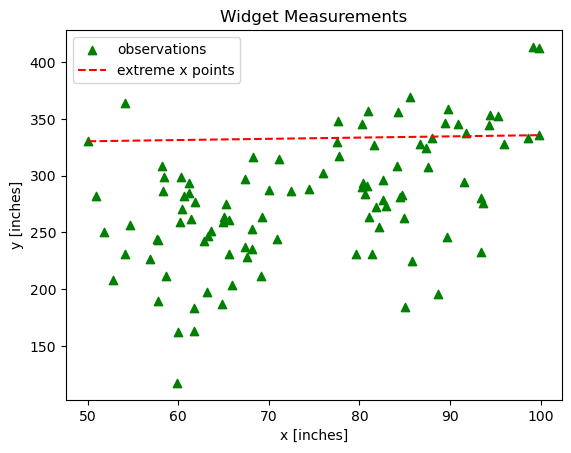

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

data = pd.read_csv('scatter_data.csv', comment='%', names = ['x','y'])
plt.scatter(data['x'], data['y'], marker='^', color='green', label='observations')
x = data['x'];
y = data['y'];
leftmost = min(x)
rightmost = max(x)
plt.plot([leftmost, rightmost], [y[x.idxmin()], y[x.idxmax()]], linestyle='--', color='red', label='extreme x points')
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.legend()
plt.show()


### Problem 2 - Histogram

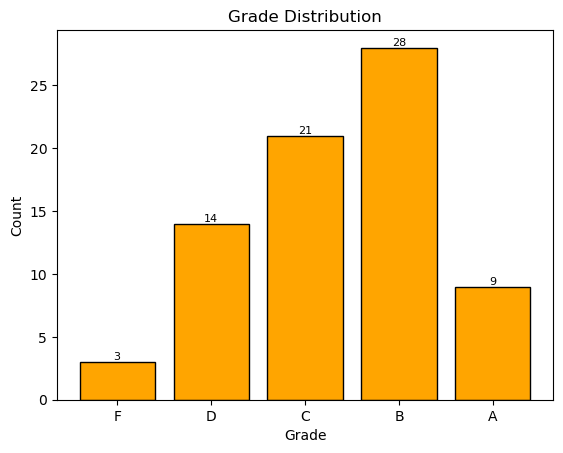

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("student_grades.csv", comment='%', names=['studentID', 'avgScore'])
grades = ['F', 'D', 'C', 'B', 'A']
positions = range(5)
count = [len(data[(data['avgScore'] < 60)]),len(data[(data['avgScore'] >= 60) & (data['avgScore'] < 70)]),len(data[(data['avgScore'] >= 70) & (data['avgScore'] < 80)]),
                   len(data[(data['avgScore'] >= 80) & (data['avgScore'] < 90)]),len(data[(data['avgScore'] >= 90)])]
plt.bar(positions,count, color='orange', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.xticks(positions, grades)
for i, j in enumerate(count):
    plt.text(i, j, str(j), fontsize=8, ha='center', va='bottom')

plt.show()


### Problem 3 - Barplot and Boxplot in the Same Figure

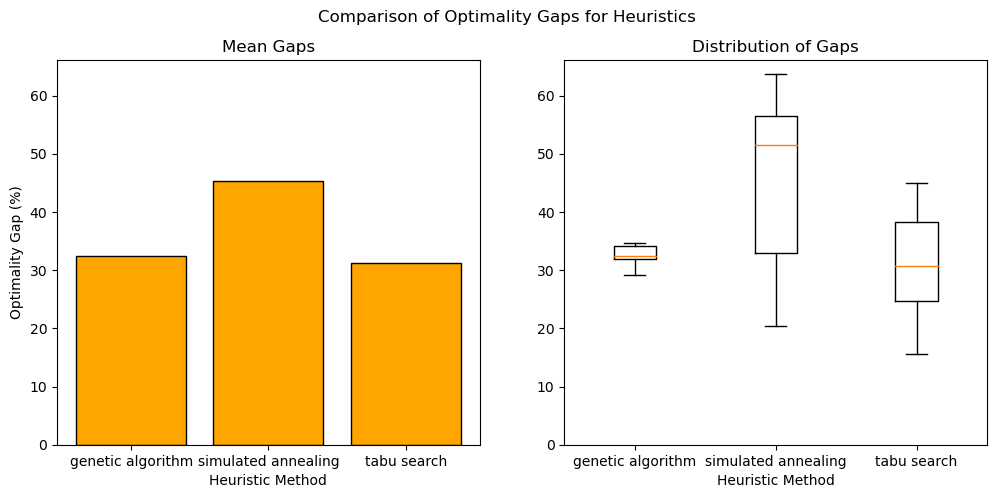

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("solution_data.csv", comment="%", names=['Problem','SolnMethod', 'Value']) 
groupdata = data.groupby('Problem')
optimalitygaps = pd.DataFrame()

for name, group in groupdata:
    optimal_OFV = group[group['SolnMethod'] == 'optimal']['Value'].values
    group['Optimality Gap'] = ((optimal_OFV - group['Value']) / optimal_OFV) * 100
    optimalitygaps = pd.concat([optimalitygaps, group], ignore_index=True)

data['Optimality Gap'] = optimalitygaps['Optimality Gap']
 
fig, (plota, plotb) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

 
methodgap = data[data['SolnMethod'] != 'optimal'].groupby('SolnMethod')['Optimality Gap'].mean()

#Plots
plota.bar(methodgap.index, methodgap.values, color='orange', edgecolor='black')
plota.set_xlabel('Heuristic Method')  
plota.set_ylabel('Optimality Gap (%)')
plota.set_title('Mean Gaps')
plotb.boxplot([data[data['SolnMethod'] == 'genetic algorithm']['Optimality Gap'].values,
                 data[data['SolnMethod'] == 'simulated annealing']['Optimality Gap'].values,
                 data[data['SolnMethod'] == 'tabu search']['Optimality Gap'].values], 
                labels=['genetic algorithm', 'simulated annealing', 'tabu search'])
plotb.set_xlabel('Heuristic Method')
plotb.set_title('Distribution of Gaps')

#limits
extrememin = min(plota.get_ylim()[0], plotb.get_ylim()[0])
extrememax = max(plota.get_ylim()[1], plotb.get_ylim()[1])
plota.set_ylim([extrememin, extrememax])
plotb.set_ylim([extrememin, extrememax])

#Show
plt.show()

--- 
## Part 2 - Explore New Plot Types

I have opted for using a Violin Plot using Seaborn to visualize the distribution of sepal lengths of Setosa, Versicolor, and Virginica flowers.
I chose Violin plot due to their ability to effectively display data distributions, combine box plots and kernel density, compare multiple distributions, accommodate different sample sizes, provide aesthetic appeal, identify modes and bimodality, and offer contextual insights, making them a valuable tool for data analysis and exploration.

**URL of Example Code**: https://seaborn.pydata.org/examples/wide_form_violinplot.html
**URL of Sample Data**: Inbuilt seaborn data


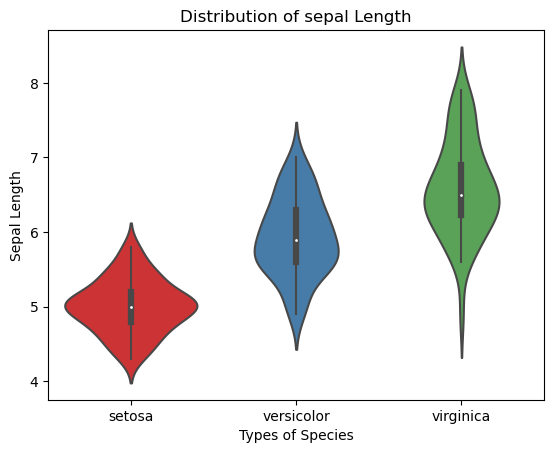

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")
iris.head()

sns.violinplot(x="species", y="sepal_length", data=iris, palette="Set1")

plt.xlabel("Types of Species")
plt.ylabel("Sepal Length")
plt.title("Distribution of sepal Length")


plt.show()

The violin plot's breadth indicates density, and the shape of the plot sheds light on the features of the data's distribution. Once more, it's a fascinating and aesthetically pleasing method to comprehend the differences in petal length between various iris species. 

The flower's sepal qualities are also included in the data. Additionally, we may make several subplots to show how the three flower species differ in terms of sepal length and breadth. Additionally, by utilising a different set (set 1, set 2, set 3) of colours, the colour palette may be altered.